<a href="https://colab.research.google.com/github/deepu718/tensorflow_practice/blob/main/03_introduction_to_computer_vision_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to convolutional Neural Networks and computer vision with tensorflow

computer vision is a practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self driving car recognizing the car in front.

## Get the data

The images we're working with are from the Food101 dataset (101 differnet classes of food): https://www.kaggle.com/datasets/dansbecker/food-101

However we've modified it to only use two classes.

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-07-18 13:36:45--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.4.128, 74.125.200.128, 74.125.68.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.4.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  21.6MB/s    in 6.2s    

2023-07-18 13:36:51 (16.9 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data

A very crucial step at the begenning of any machine learning project is becoming ne with data. and for a computer vision project this usually means visualizing many samples of your data.

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/

pizza  steak


In [4]:
!ls pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [5]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames, in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [6]:
# another way to find put the number of images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

## To visualize our images, first let's get the class names programmatically.

In [7]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))# Created a list of class names from sub directory
print(class_names)

['pizza' 'steak']


In [8]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  #Setup the target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  print(f"Image shape: {img.shape}") # show the rhe shape of the image

  return img

Image shape: (388, 512, 3)


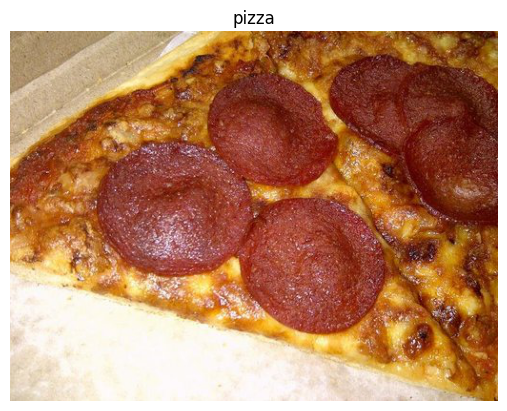

In [9]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [10]:
# get all the pixel values between 0 and 1
img/255.

array([[[0.61960784, 0.52941176, 0.39607843],
        [0.60784314, 0.51764706, 0.38431373],
        [0.63529412, 0.54509804, 0.41176471],
        ...,
        [0.53333333, 0.34117647, 0.10980392],
        [0.57254902, 0.39607843, 0.12941176],
        [0.62352941, 0.45098039, 0.16470588]],

       [[0.6745098 , 0.58431373, 0.45098039],
        [0.6       , 0.50980392, 0.37647059],
        [0.6       , 0.50980392, 0.37647059],
        ...,
        [0.45098039, 0.25098039, 0.03529412],
        [0.51764706, 0.32941176, 0.07843137],
        [0.56862745, 0.38431373, 0.11764706]],

       [[0.6       , 0.50980392, 0.37647059],
        [0.6       , 0.50980392, 0.37647059],
        [0.61960784, 0.52941176, 0.39607843],
        ...,
        [0.39607843, 0.18431373, 0.        ],
        [0.45882353, 0.25490196, 0.03137255],
        [0.4745098 , 0.27843137, 0.03921569]],

       ...,

       [[0.83529412, 0.77254902, 0.6745098 ],
        [0.8627451 , 0.8       , 0.70196078],
        [0.83529412, 0

## An end-to-end example

Let's build conv neural network to find patterns in our images, more specifically we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to fid patterns in ur images
* Compile our CNN
* Fit the CNN to our training data

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 and 1)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# setup paths to our data directories
train_dir = "pizza_steak/train"
test_dir =  "pizza_steak/test"
# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 27s 243ms/step - loss: 0.5525 - accuracy: 0.7340 - val_loss: 0.4091 - val_accuracy: 0.8440
Epoch 2/5
47/47 [==============================] - 11s 233ms/step - loss: 0.4494 - accuracy: 0.8033 - val_loss: 0.4058 - val_accuracy: 0.8080
Epoch 3/5
47/47 [==============================] - 12s 257ms/step - loss: 0.4217 - accuracy: 0.8173 - val_loss: 0.3699 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 11s 232ms/step - loss: 0.3924 - accuracy: 0.8247 - val_loss: 0.3699 - val_accuracy: 0.8380
Epoch 5/5
47/47 [==============================] - 11s 232ms/step - loss: 0.3334 - accuracy: 0.8660 - val_loss: 0.3759 - val_accuracy: 0.8260


In [12]:
# Get a model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Using the same model as before

In [13]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the tensorflow plyground model

model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# compile the model

model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 12s 214ms/step - loss: 1.0214 - accuracy: 0.4973 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 206ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 10s 220ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 223ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 10s 217ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [14]:
# Get the summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the tensorflow plyground model

model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# compile the model

model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 12s 218ms/step - loss: 3.2955 - accuracy: 0.6307 - val_loss: 0.6764 - val_accuracy: 0.7400
Epoch 2/5
47/47 [==============================] - 10s 221ms/step - loss: 0.8321 - accuracy: 0.6967 - val_loss: 0.4966 - val_accuracy: 0.7800
Epoch 3/5
47/47 [==============================] - 10s 219ms/step - loss: 0.7071 - accuracy: 0.7307 - val_loss: 1.9226 - val_accuracy: 0.5480
Epoch 4/5
47/47 [==============================] - 10s 223ms/step - loss: 0.7437 - accuracy: 0.7293 - val_loss: 0.9442 - val_accuracy: 0.6420
Epoch 5/5
47/47 [==============================] - 10s 221ms/step - loss: 0.5597 - accuracy: 0.7580 - val_loss: 1.2049 - val_accuracy: 0.5140


In [16]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


## Binary Classification: Let's break it down

1. Became one with the data (visualize, visualize, visualize)
2. Preprocesses the data (prepared it for our model, the main step here was scaling/normalizing)
3. Created a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjsut different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfiead (experiment)

## 1. Became one with the data

Image shape: (512, 512, 3)
Image shape: (341, 512, 3)


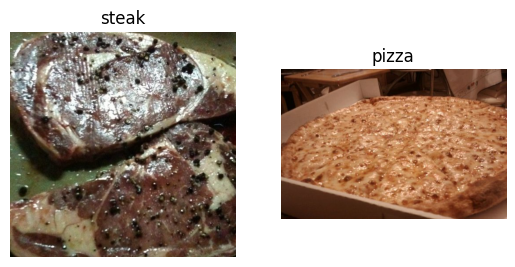

In [20]:
# visualize the data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

## 2. Preprocess the data (prepare it for a model)

In [25]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**

A batch is a small subset of data. Rather than look at all ~10,000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10,000 images(or more) might not fit into the memory of our processor(GPU).
2. Trying to learn the pattern in 10,000 images in one hit could result in the model not being able to learn very well.

In [26]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen =ImageDataGenerator(rescale=1/255.)
test_datagen =ImageDataGenerator(rescale=1/255.)

In [27]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # Target dir of images
                                               target_size=(224,224), # target size of images (height, width)
                                               class_mode="binary",# type of data you're working with
                                               batch_size=32) # size of minibatches to load data into
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [28]:
# Get a sample of train data batch
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [29]:
# How many batches are there?
len(train_data)

47

In [31]:
# view the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

## 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learing experiment and then as you keep experimenting, you try to beat the baseline.

In [34]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten,  Conv2D, MaxPooling2D, Activation
from tensorflow.keras import Sequential

In [47]:
# Create the model (this will be our baseline, a layer convolutional neural network)
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(224,224,3)), # input layer
    Conv2D(10,3, activation="relu"),
    Conv2D(10,3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") # output layer
])

In [48]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
               optimizer=Adam(),
               metrics=["accuracy"])

In [49]:
# Get a summary of our model
model_4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_10 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 flatten_4 (Flatten)         (None, 475240)            0         
                                                                 
 dense_9 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


## 4. Fit the model

In [50]:
history_4 = model_4.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 13s 242ms/step - loss: 0.8459 - accuracy: 0.5847 - val_loss: 0.5445 - val_accuracy: 0.7440
Epoch 2/5
47/47 [==============================] - 18s 391ms/step - loss: 0.5224 - accuracy: 0.7587 - val_loss: 0.4367 - val_accuracy: 0.8220
Epoch 3/5
47/47 [==============================] - 15s 326ms/step - loss: 0.4175 - accuracy: 0.8253 - val_loss: 0.3626 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 17s 372ms/step - loss: 0.3589 - accuracy: 0.8507 - val_loss: 0.3648 - val_accuracy: 0.8520
Epoch 5/5
47/47 [==============================] - 12s 240ms/step - loss: 0.2424 - accuracy: 0.9180 - val_loss: 0.3694 - val_accuracy: 0.8320


## 5. Evaluating our model
it looks like our model is learning something, let's evaluate it

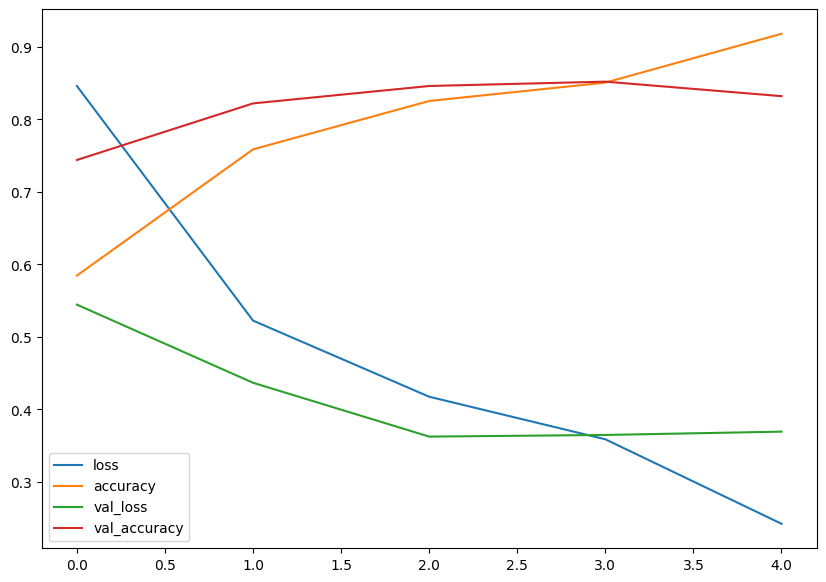

In [51]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7));

In [53]:
# Plot the validation and training curves separetely
def plot_loss_curves(history):
  """
  return separate loss curves for training and validation loss
  """

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();

**Note** when a model's **validation loss starts to increase**, it's likely that the model is overfitting the training dataset. This means, it's learning the patterns dataset *too well* and thus the model's ability generalize to unseen data will be diminished.

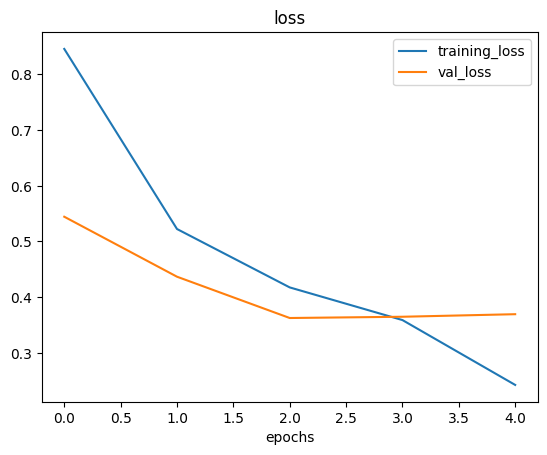

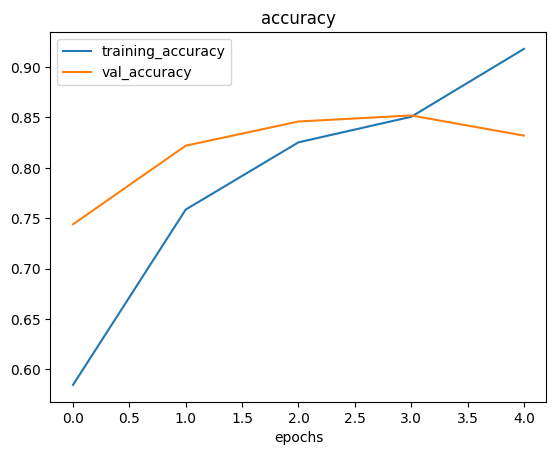

In [55]:
# Check out the loss and accuracy of model
plot_loss_curves(history_4)

## 6. Adjust the model parameters
Fitting a machine leaning model comes in 3 sample_data/

0. Create a Baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

ways to induce overfitting:
* Increase the number of conv layers
* Increase the number of conv filters
* Add another Dense layer to the output of our flattend layer

Reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MacPool2D)
* Add more data...

In [57]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPooling2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPooling2D(),
    Conv2D(10,3,activation="relu"),
    MaxPooling2D(),
    Flatten(),
    Dense(1,activation="sigmoid")

])

In [58]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [59]:
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 16s 287ms/step - loss: 0.5908 - accuracy: 0.6867 - val_loss: 0.5241 - val_accuracy: 0.7300
Epoch 2/5
47/47 [==============================] - 10s 222ms/step - loss: 0.4697 - accuracy: 0.7800 - val_loss: 0.3946 - val_accuracy: 0.8100
Epoch 3/5
47/47 [==============================] - 12s 264ms/step - loss: 0.4229 - accuracy: 0.8100 - val_loss: 0.4018 - val_accuracy: 0.8040
Epoch 4/5
47/47 [==============================] - 16s 353ms/step - loss: 0.4105 - accuracy: 0.8247 - val_loss: 0.3453 - val_accuracy: 0.8400
Epoch 5/5
47/47 [==============================] - 15s 318ms/step - loss: 0.3766 - accuracy: 0.8367 - val_loss: 0.3384 - val_accuracy: 0.8440


In [60]:
model_5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 26, 26, 10)      

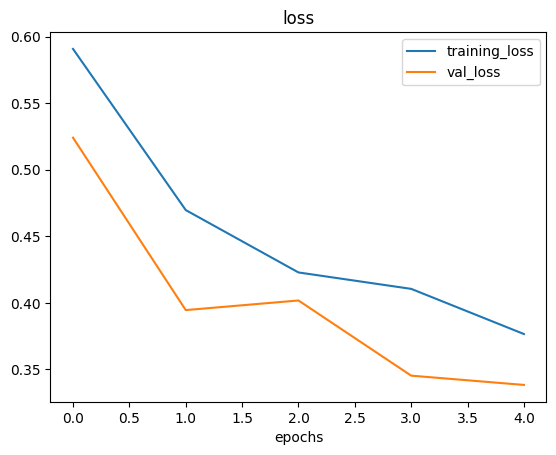

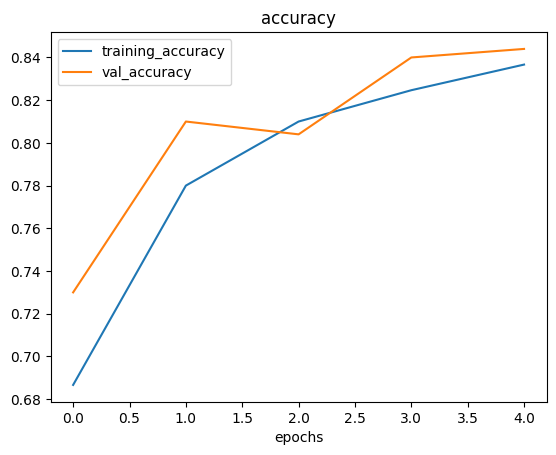

In [61]:
# Plot lost curves
plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augmentation

In [62]:
# Create ImageDataGenerator trainig instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)
# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGeneratorwithout data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

In [69]:
# Import data and augment it from training directory
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   class_mode="binary",
                                                                   batch_size=32,
                                                                   shuffle=True)
# Create non_aug train data batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=True)

# Create non_augmented test data batches
test_data =test_datagen.flow_from_directory(test_dir,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode="binary")

Augmented training data
Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [70]:
# Get sample augmented data batches
images, labels = train_data.next()
augmented_images,augmented_labels = train_data_augmented.next()

(-0.5, 223.5, 223.5, -0.5)

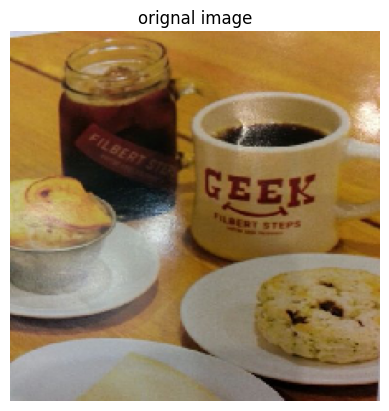

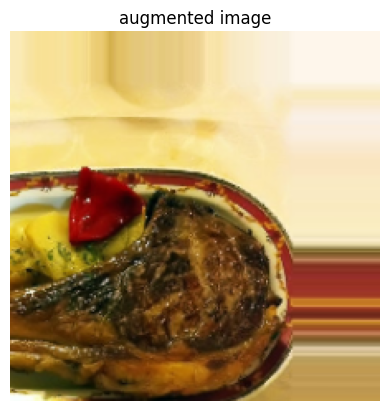

In [71]:
# Show orignal image and augmented image
random_number = random.randint(0,32)
plt.imshow(images[random_number])
plt.title(f"orignal image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"augmented image")
plt.axis(False)

In [72]:
# Create the model (this is going to be our new baseline)
model_6 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPooling2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPooling2D(),
    Conv2D(10,3,activation="relu"),
    MaxPooling2D(),
    Flatten(),
    Dense(1,activation="sigmoid")

])

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# fit the model
history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 27s 529ms/step - loss: 0.6692 - accuracy: 0.5767 - val_loss: 0.5601 - val_accuracy: 0.7340
Epoch 2/5
47/47 [==============================] - 25s 538ms/step - loss: 0.6181 - accuracy: 0.6660 - val_loss: 0.5111 - val_accuracy: 0.7840
Epoch 3/5
47/47 [==============================] - 25s 539ms/step - loss: 0.5618 - accuracy: 0.7167 - val_loss: 0.4379 - val_accuracy: 0.8020
Epoch 4/5
47/47 [==============================] - 26s 544ms/step - loss: 0.5284 - accuracy: 0.7520 - val_loss: 0.4208 - val_accuracy: 0.8280
Epoch 5/5
47/47 [==============================] - 25s 539ms/step - loss: 0.5316 - accuracy: 0.7313 - val_loss: 0.3820 - val_accuracy: 0.8320


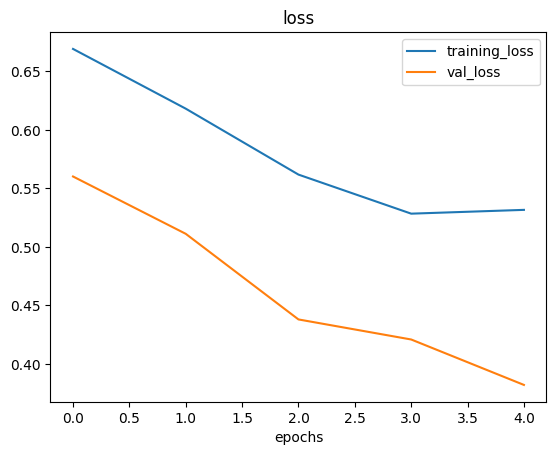

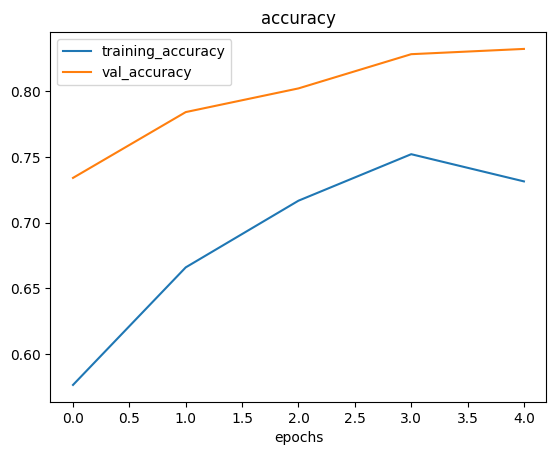

In [73]:
# Check our models training curve
plot_loss_curves(history_6)

## 7. Repeat until satisfied

Since we've already beaten our baseline , there are a few theings we could try to continue to improve our model:
* Increase the number of model layers (e.g. add more `Conv2D` / `MaxPool2D` layers)
* Increase the number of filters in each convolutional layer
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data (give the model more opportunities to learn)
* Use **transfer learning** to leverage what another image model has learn and adjust it for our own use case.

In [89]:
# Create a function to import image and resize it to be able to be used
import tensorflow as tf
def load_and_prep_image(filename,img_shape=224):
  # read in the image
  img = tf.io.read_file(filename)
  # decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [90]:
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [92]:
pred = model_6.predict(tf.expand_dims(steak,axis=0))

1/1 [==============================] - 0s 22ms/step


In [93]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [94]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image loacated at filename, makes a predicrion with model and plots
  the image with the predicted class as the title
  """
  # import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # plot the image and predicted class
  plt.imshow(img)
  plt.title(f"prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 38ms/step


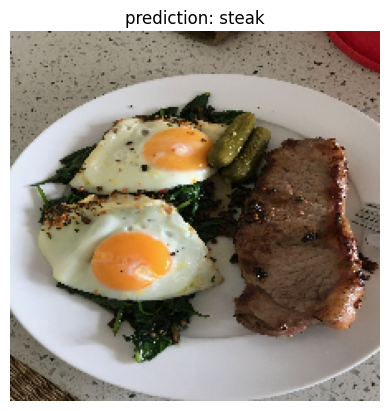

In [95]:
# test our model on a custom image
pred_and_plot(model_6, "03-steak.jpeg")